**Análise do Impacto da Variação do Dólar no Salário de Brasileiros Prestadores de Serviços para Empresas Estrangeiras**

Autor: Oscar Monteiro

**Introdução:**

Este Jupyter Notebook tem como objetivo analisar o impacto da variação do dólar no salário de prestadores de serviços brasileiros que contratados por empresas estrangeiras. Com a crescente globalização do mercado de trabalho e a popularização do trabalho remoto, muitos profissionais de tecnologia no Brasil têm encontrado oportunidades de emprego em empresas estrangeiras, onde seus serviços são contratados em dólares americanos ou outras moedas estrangeiras.

Nesta análise, examinaremos como a variação do dólar em relação ao real brasileiro pode afetar o salário desses profissionais ao longo do tempo. A compreensão desses impactos é crucial para os prestadores de serviços ao negociar reajustes salariais com base na inflação cambial das moedas do contrato em vigencia.

Em alguns cenários o contrato pode ser fixado em BLR, portanto quem assume a variação do cambio no dia do pagamento é a empresa e nao mais o contractor.

Em ambos os cenários a análise pode ser util, visando a retenção de colaboradores e competitividade em relação ao salário negociado.

**Metodologia:**

1. **Obtenção de Dados:** Utilizaremos a biblioteca `yfinance` para obter dados históricos da taxa de câmbio entre o dólar americano (USD) e o real brasileiro (BRL).

2. **Análise de Dados:** Calcularemos a média mensal da taxa de câmbio e examinaremos as variações percentuais e absolutas ao longo do tempo.

3. **Impacto no Salário:** Analisaremos como essas variações na taxa de câmbio podem impactar o salário de um desenvolvedor brasileiro que recebe seus pagamentos em dólares americanos ou outras moedas que serão convertidas em BLR.

4. **Análise de Reajustes:** Essas informações poder ser uteis na analise e eventual pleito de reajustes salariais com base na inflação cambial das moedas uma vez que o dólar recebido será convertido e consumido em reais.

**Objetivos:**

- Compreender o impacto da variação do dólar no salário de prestadores de serviços brasileiros que prestam serviços para empresas estrangeiras.
- Proporcionar insights para profissionais de tecnologia ao negociar reajustes salariais com base na inflação cambial das moedas do contrato.
- Demonstrar a importância da análise de dados financeiros na tomada de decisões relacionadas a carreira e remuneração.

**Nota Legal:** Esta análise destina-se apenas a fins educacionais e não constitui aconselhamento financeiro ou de investimento. Os resultados e conclusões podem variar dependendo de fatores individuais e do contexto econômico atual.

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def obter_dados_historicos(par_moedas, startdate, enddate):
    try:
        dados_historicos = yf.download(par_moedas, start=startdate, end=enddate)
        return dados_historicos
    except Exception as e:
        print("Erro ao obter dados históricos:", e)
        return None

def calcular_media_mensal(valor_recebido, dados_historicos):
    try:
        dados_historicos['Valor_em_BLR'] = valor_recebido * dados_historicos['Close']
        dados_dia_1_7 = dados_historicos[dados_historicos.index.day <= 7]
        media_mensal = dados_dia_1_7['Valor_em_BLR'].resample('M').mean()
        media_mensal.index = media_mensal.index.to_period('M').to_timestamp() + pd.offsets.MonthBegin(0)
        return media_mensal
    except Exception as e:
        print("Erro ao calcular a média mensal:", e)
        return None

def calcular_variacoes(media_mensal):
    try:
        variacao_percentual = media_mensal.pct_change() * 100
        variacao_percentual_acumulada = variacao_percentual.cumsum()
        variacao_absoluta = media_mensal.diff()
        variacao_percentual_absoluta = variacao_absoluta.cumsum()
        return variacao_percentual, variacao_percentual_acumulada, variacao_absoluta, variacao_percentual_absoluta
    except Exception as e:
        print("Erro ao calcular as variações:", e)
        return None, None, None, None

def gerar_variacoes_df(variacao_percentual, variacao_absoluta, media_mensal):
    try:
        variacoes_df = pd.DataFrame({
            'Variação (%)': variacao_percentual,
            'Variação (R$)': variacao_absoluta,
            'Média Mensal (BLR)': media_mensal
        })
        variacoes_df = variacoes_df.round(2)
        variacoes_df.index = variacoes_df.index.to_period('M').to_timestamp() + pd.offsets.MonthBegin(0)
        return variacoes_df
    except Exception as e:
        print("Erro ao gerar o DataFrame de variações:", e)
        return None

def plotar_grafico(dados_historicos, media_mensal, variacao_percentual):
    try:
        primeiro_valor = media_mensal.iloc[0]
        valor_acumulado_recente = variacao_percentual_acumulada.iloc[-1]
        valor_acumulado_abs_recente = variacao_percentual_absoluta.iloc[-1]

        plt.figure(figsize=(16, 4))
        plt.plot(dados_historicos.index, dados_historicos['Valor_em_BLR'], label=par_moedas, alpha=0.5)
        plt.plot(media_mensal.index, media_mensal, label='Média (dias 1-7 do mês)', color='red')
        for i, txt in enumerate(variacao_percentual):
            plt.annotate(f'{txt:.2f}%', (media_mensal.index[i], media_mensal[i]), textcoords="offset points", xytext=(0,25), ha='center')
        for i, valor in enumerate(variacao_absoluta):
            plt.annotate(f'{valor:.2f} R$', (media_mensal.index[i], media_mensal[i]), textcoords="offset points", xytext=(0,13), ha='center')
        plt.axhline(y=primeiro_valor, color='gray', linestyle='--')
        plt.title(f'Evolução de $ {valor_recebido:.2f} USD em BLR\nVariação Percentual Acumulada no período: {valor_acumulado_recente:.2f}%\nVariação Absoluta Acumulada no período: {valor_acumulado_abs_recente:.2f} BLR')
        plt.xlabel('Data')
        plt.ylabel('Valor em BLR')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print("Erro ao plotar o gráfico:", e)

[*********************100%%**********************]  1 of 1 completed


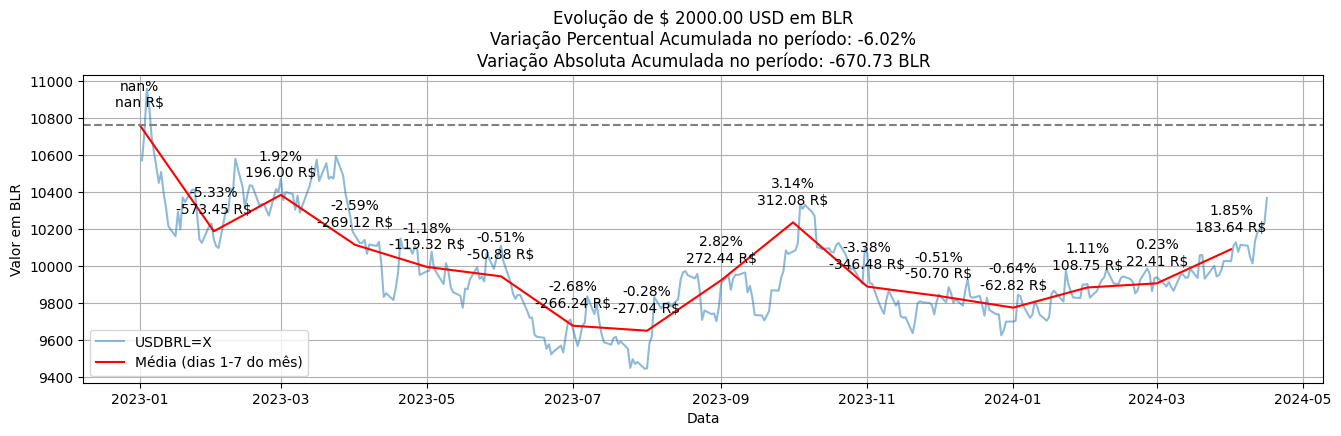

---------------------------------------------------------
Considerando a média dos dias 1-7 de cada mês do periodo analisado:
Variações - Em relação ao mês anterior:
---------------------------------------------------------
            Variação (%)  Variação (R$)  Média Mensal (BLR)
Date                                                       
2023-01-01           NaN            NaN            10761.61
2023-02-01         -5.33        -573.45            10188.16
2023-03-01          1.92         196.00            10384.16
2023-04-01         -2.59        -269.12            10115.04
2023-05-01         -1.18        -119.32             9995.72
2023-06-01         -0.51         -50.88             9944.84
2023-07-01         -2.68        -266.24             9678.60
2023-08-01         -0.28         -27.04             9651.56
2023-09-01          2.82         272.44             9924.00
2023-10-01          3.14         312.08            10236.08
2023-11-01         -3.38        -346.48             9889

In [7]:
if __name__ == "__main__":
    par_moedas = "USDBRL=X"
    startdate = "2023-01-01"
    enddate = "2024-04-17"
    valor_recebido = 2000

    dados_historicos = obter_dados_historicos(par_moedas, startdate, enddate)
    if dados_historicos is not None:
        media_mensal = calcular_media_mensal(valor_recebido, dados_historicos)
        if media_mensal is not None:
            variacao_percentual, variacao_percentual_acumulada, variacao_absoluta, variacao_percentual_absoluta = calcular_variacoes(media_mensal)
            if all(v is not None for v in [variacao_percentual, variacao_percentual_acumulada, variacao_absoluta, variacao_percentual_absoluta]):
                variacoes_df = gerar_variacoes_df(variacao_percentual, variacao_absoluta, media_mensal)
                if variacoes_df is not None:
                    plotar_grafico(dados_historicos, media_mensal, variacao_percentual)
                    print("---------------------------------------------------------")
                    print("Considerando a média dos dias 1-7 de cada mês do periodo analisado:")
                    print("Variações - Em relação ao mês anterior:")
                    print("---------------------------------------------------------")
                    print(variacoes_df)

In [8]:
primeiro_valor = variacoes_df.iloc[0]['Média Mensal (BLR)']
quantidade_meses = len(variacoes_df)
valor_total_fixado = primeiro_valor * quantidade_meses
soma_media_mensal = variacoes_df['Média Mensal (BLR)'].sum()
diferenca_periodo = soma_media_mensal - valor_total_fixado


print("Periodo analisado: ", quantidade_meses,"Meses")
print("Valor total Periodo - Contrato Fixado em BLR: ", valor_total_fixado.round(2),"R$")
print("Valor total Periodo - Contrato Fixado em USD: ", soma_media_mensal.round(2),"R$")
print("Diferença do periodo: ", diferenca_periodo.round(2),"R$")

Periodo analisado:  16 Meses
Valor total Periodo - Contrato Fixado em BLR:  172185.76 R$
Valor total Periodo - Contrato Fixado em USD:  160267.3 R$
Diferença do periodo:  -11918.46 R$
